### the problem statement 
* Analyze the Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Check how satisfied customers are with the clothes


### Notebook Objectives
   * Loading the data
   * Preprocessing the data
   * Explore features or charecteristics to Check how satisfied customers are with the clothes
   * Develop prediction models
   * Evaluate and refine prediction model

In [1]:
# required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob import Word
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics

from scipy.stats import chi2_contingency

In [81]:
!pip install imblearn

     ------------------------------------ 226.0/226.0 kB 394.4 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 735.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [26]:
# load data to dataFrame
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [27]:
#read the first rows of data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [18]:
# show shape of dataSet
df.shape

(23486, 11)

In [19]:
#Show more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [20]:
# show count of nulls in each row
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#show name of columns
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Clean data

In [21]:
df.dropna(subset=['Division Name', 'Department Name', 'Class Name'],  axis= 0,inplace =True)

In [22]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [23]:
df.shape

(23472, 11)

In [30]:
# Drop unseful columns
df.drop('Unnamed: 0',axis=1, inplace=True)

In [32]:
df.drop('Title',axis=1, inplace=True)

In [33]:
# chech column names 
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [34]:
# Convert review text to string
df['Review Text'] = df['Review Text'].astype(str)

# EDA

### What is the average age of the customers?

In [13]:
# explore the distribution of Age customer 
df.Age.describe()

count    23472.000000
mean        43.200707
std         12.280913
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Count Of Age')

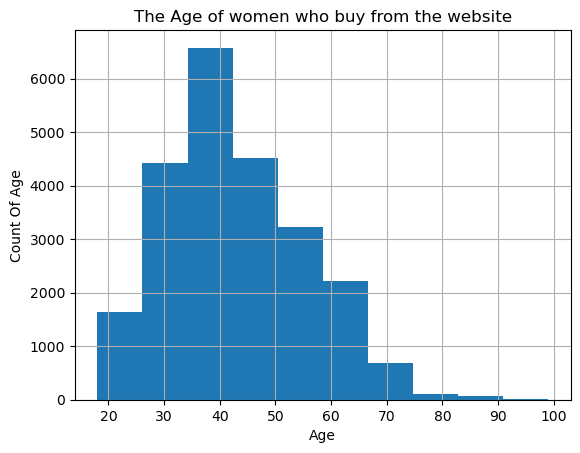

In [40]:
# visualize the distribution of Age
df.hist('Age')
plt.title('The Age of women who buy from the website')
plt.xlabel('Age')
plt.ylabel('Count Of Age')

#### The average of age of customers  is equal 43.198544

## What is the general rating for Women's E-Commerce Clothing ?

Text(0.5, 1.0, 'Rating distribution')

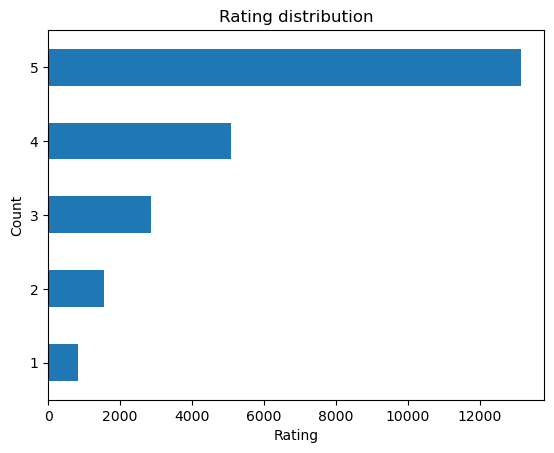

In [42]:
# visualize the general rating
df.Rating.value_counts(ascending = True).plot(kind ='barh')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')

In [17]:
Percentage_Rating = (len(df[df['Rating'] ==5 ]) / len(df['Rating']))*100
Percentage_Rating

55.883605998636675

***More than 50% of Rating is the best***

In [18]:
df['Positive Feedback Count'].describe()

count    23472.000000
mean         2.537151
std          5.703597
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

### For each rating score, what is the average age have it? 

Text(0.5, 1.0, 'Rating Based On Average Age')

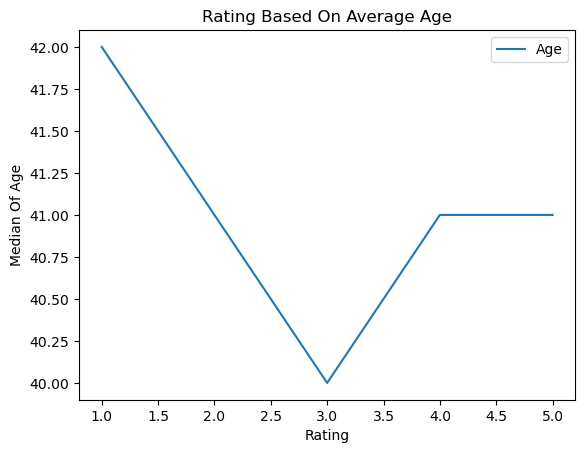

In [19]:
#Rating based on Age
pd.DataFrame(df.groupby('Rating')['Age'].median()).plot()
plt.ylabel('Median Of Age')
plt.xlabel('Rating')
plt.title("Rating Based On Average Age")

In [20]:
df.groupby('Rating')['Age'].mean()

Rating
1    43.693587
2    42.622364
3    42.158481
4    42.887532
5    43.587406
Name: Age, dtype: float64

***it is the same average for all scors***

### What is the Rating for each Department Name?

Text(0.5, 1.0, 'Rating Of Each Department Name')

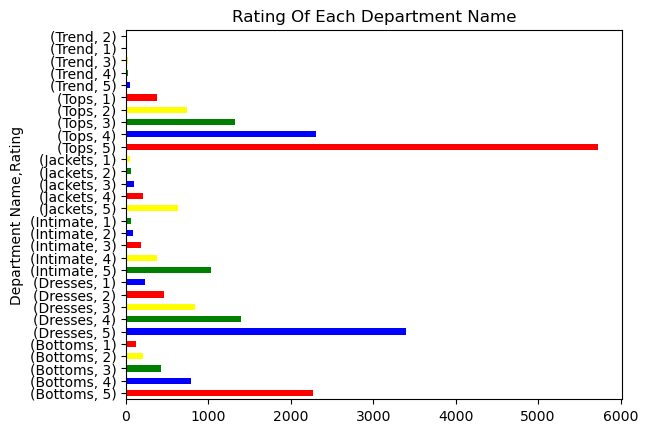

In [22]:
# visualize the rating of each department name 
(df.groupby('Department Name')['Rating'].value_counts()).plot(kind ='barh', stacked=False, color=['red', 'blue', 'green', 'yellow'])
plt.title("Rating Of Each Department Name")

***Department Name of highest Rating is top***

###  What is the rating of each Division Name?

Text(0.5, 1.0, 'Rating OF Each Division Name')

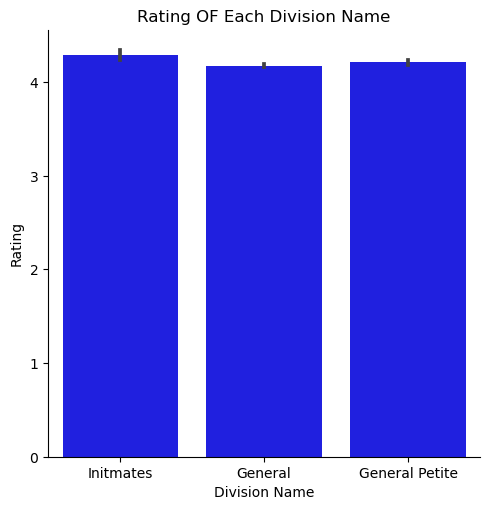

In [23]:
# visualize rating of each Division Name
sns.catplot(data=df, x="Division Name", y="Rating", kind="bar", color='b')
plt.title("Rating OF Each Division Name")

***it all has the same rating rang***

### What is the count of Division Name? 

Text(0, 0.5, 'Division Name')

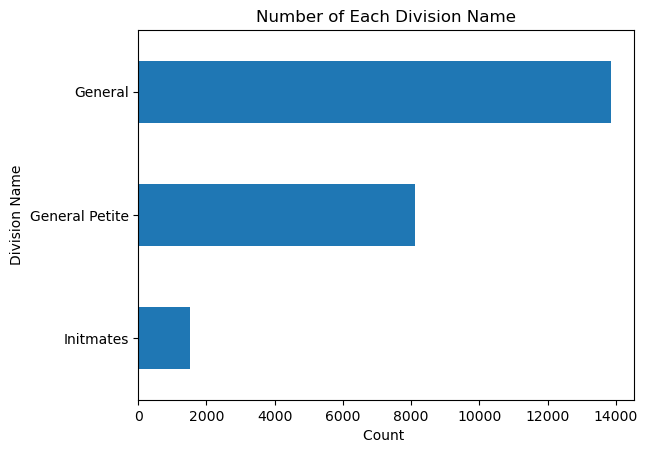

In [24]:
## visualize the count of each Division Name
df['Division Name'].value_counts(ascending=True)[:].plot(kind='barh')
plt.title('Number of Each Division Name')
plt.xlabel("Count ")
plt.ylabel("Division Name")

***As appear in plot General has most popular***

### What is the count of each Class Name?

Text(0, 0.5, 'Class Name')

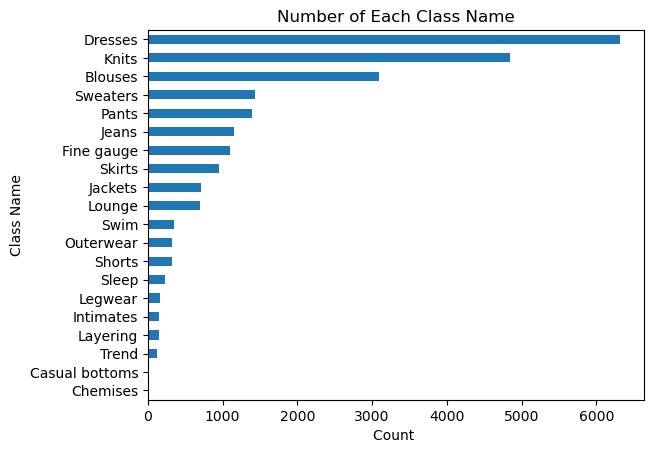

In [25]:
# visualize the count of Class Name
df['Class Name'].value_counts(ascending=True)[:].plot(kind='barh')
plt.title('Number of Each Class Name')
plt.xlabel("Count ")
plt.ylabel("Class Name")

***The top count of Class name is Dresses, and Knits, Blouses***

### What is rating of each Department Name?

In [26]:
#Class name based on  Rating
df_groupby_class_name = pd.DataFrame(df.groupby(['Class Name'])['Rating'].value_counts(ascending=False))
df_groupby_class_name.rename(columns={'Rating': 'Count'}, inplace=True)
df_groupby_class_name[:10]

Count
Class Name     Rating       
Blouses        5        1686
               4         669
               3         394
               2         229
               1         119
Casual bottoms 4           1
               5           1
Chemises       4           1
Dresses        5        3397
               4        1395

Text(0.5, 1.0, 'Rating of Each Class Name')

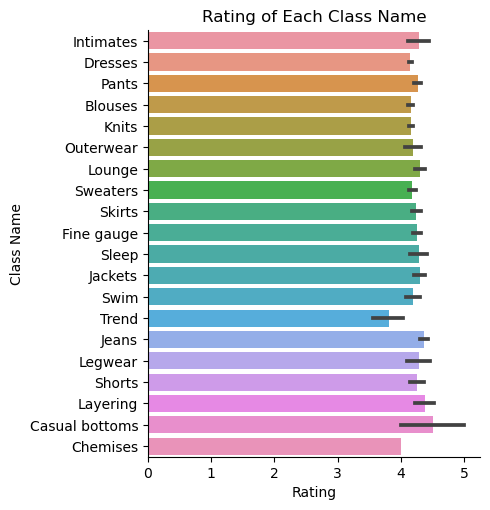

In [27]:
#visualization of rating for each class
sns.catplot(data=df, x='Rating', y='Class Name', kind='bar')
plt.title('Rating of Each Class Name')

In [28]:
df.groupby('Class Name')['Recommended IND'].value_counts()

Class Name      Recommended IND
Blouses         1                  2509
                0                   588
Casual bottoms  1                     2
Chemises        1                     1
Dresses         1                  5107
                0                  1212
Fine gauge      1                   921
                0                   179
Intimates       1                   132
                0                    22
Jackets         1                   595
                0                   109
Jeans           1                  1011
                0                   136
Knits           1                  3960
                0                   883
Layering        1                   129
                0                    17
Legwear         1                   142
                0                    23
Lounge          1                   594
                0                    97
Outerwear       1                   268
                0                    60
Pants   

In [29]:
df.Title.value_counts()

Love it!                           136
Beautiful                           95
Love                                88
Love!                               83
Beautiful!                          72
                                  ... 
Flattering, vintage feel             1
Very straight                        1
Not for my body                      1
Perfect transition dress             1
Please make more like this one!      1
Name: Title, Length: 13984, dtype: int64

C:\Users\omnia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

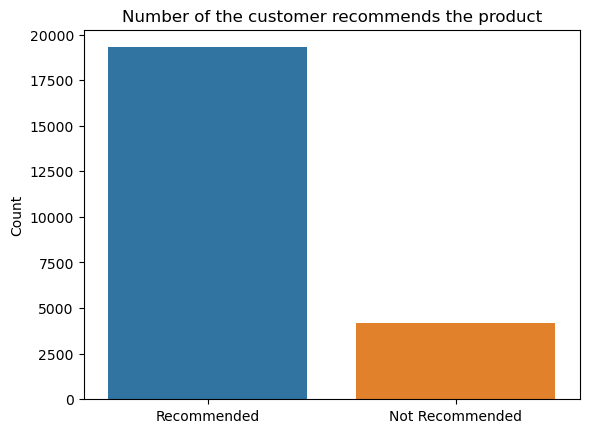

In [30]:
#visualize no of recommended product vs not Recommended
x = ['Recommended', 'Not Recommended']
y = [df['Recommended IND'].value_counts()[1], df['Recommended IND'].value_counts()[0]]
sns.barplot(x,y)
plt.title('Number of the customer recommends the product')
plt.ylabel('Count')

Text(0.5, 1.0, 'Division Name Based On Recommended or Not ')

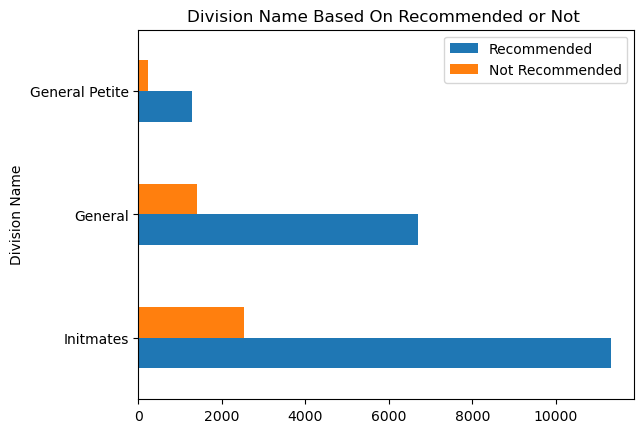

In [31]:
# visualize Division Name based on Recommended or not 
y=list(df.groupby('Division Name')['Recommended IND'].value_counts().values)
Recommended_List = [y[0], y[2], y[4]]
Not_Recommended_List = [y[1], y[3], y[5]]
pd.DataFrame({'Division Name': list(df['Division Name'].dropna().unique()), 'Recommended': Recommended_List,  'Not Recommended':Not_Recommended_List}).set_index('Division Name').plot(kind='barh', stacked=False)
plt.title('Division Name Based On Recommended or Not ')

Text(0.5, 1.0, 'The Name Of Each Category Based On Recommend Or Not Recommend ')

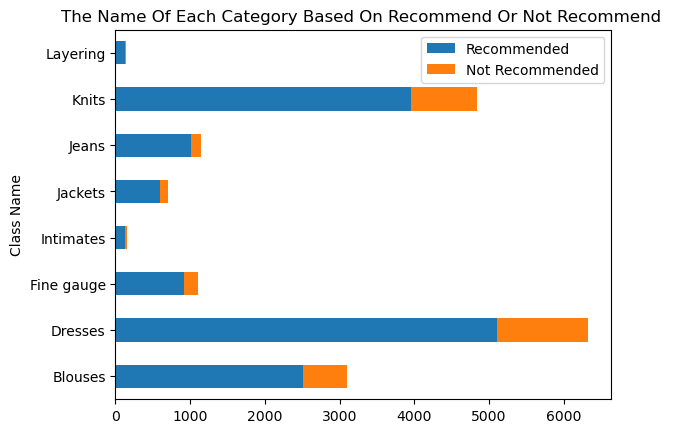

In [32]:
# visualize the class name based on Recommended or not
y=list(df.groupby('Class Name')['Recommended IND'].value_counts(ascending= False).values)
Class_Name_list = ['Blouses', 'Dresses', 'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering']
Recommended_List = [y[0], y[4], y[6], y[8], y[10], y[12], y[14], y[16]]
Not_Recommended_List = [y[1], y[5], y[7], y[9], y[11], y[13], y[15], y[17]]
pd.DataFrame({'Class Name': Class_Name_list, 'Recommended': Recommended_List,\
              'Not Recommended':Not_Recommended_List}).set_index('Class Name').plot(kind='barh', stacked=True)
plt.title('The Name Of Each Category Based On Recommend Or Not Recommend ')

***The most Class Name are Recommended***

In [37]:
df.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


In [34]:
df['polarity'] = df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [35]:
len(df[df['polarity'] <0]['polarity'])

1322

In [37]:
special_characters = ['!','#','$','%', '&','@','[',']','_',',','.']
for _,ch in enumerate(special_characters):
    df['Review Text'] = df['Review Text'].str.replace(ch,'',regex=True)
df['Review Text'] = df['Review Text'].str.lower()

In [67]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have" } 

# function to expand contractions
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [68]:
df['Review Text'] = df['Review Text'].apply(lambda x:cont_to_exp(x))

In [78]:
X = df[['Age','Rating','Positive Feedback Count','Department Name','polarity']]
y = df['Recommended IND']
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state=42)

<AxesSubplot:>

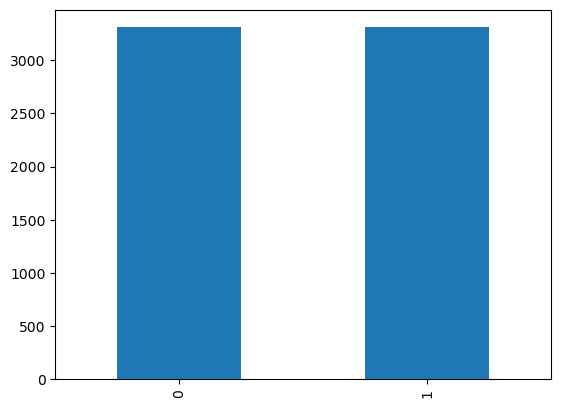

In [83]:
under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
y_train.value_counts().plot(kind='bar')

In [84]:
nominal = ['Department Name']
numerical = ['Age','Rating','Positive Feedback Count','polarity']

In [86]:
nominal_pipeline = Pipeline([
    ('imputer_n' , SimpleImputer(strategy='most_frequent')),
    ('encoder_n', OneHotEncoder(sparse=True, handle_unknown="ignore"))
])
numerical_pipeline = Pipeline([
    ('imputer_nu' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])




preprocessing_pipeline = ColumnTransformer([
    ('nominal_preprocessor', nominal_pipeline, nominal),
    ('numerical_preprocessor', numerical_pipeline, numerical)
])

In [87]:
gaussian_nb_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('GaussianNB',GaussianNB())
])

In [88]:
bernoulli_nb_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('GaussianNB',BernoulliNB())
])

In [89]:
cross_val = KFold(n_splits = 10)
scores = cross_val_score(bernoulli_nb_pipeline, X = X_train , y = y_train , cv = cross_val)

In [90]:
cross_val = KFold(n_splits = 10)
scores = cross_val_score(gaussian_nb_pipeline, X = X_train , y = y_train , cv = cross_val)

In [91]:
model2 = bernoulli_nb_pipeline.fit(X_train,y_train)
model2.score(X_test,y_test)

model = gaussian_nb_pipeline.fit(X_train,y_train)
model.score(X_test,y_test)

0.9201277955271565

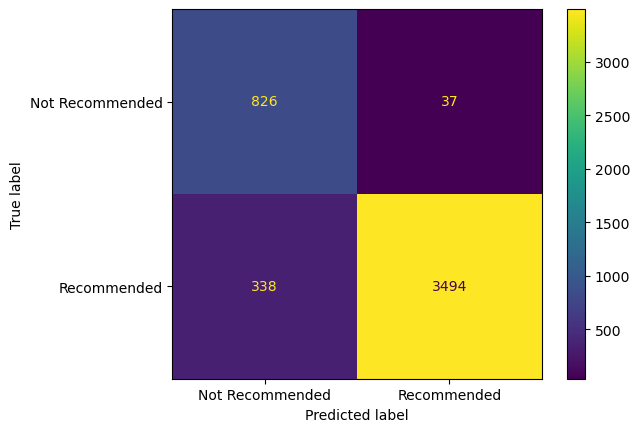

In [92]:
cm = confusion_matrix(y_true=y_test , y_pred=model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Not Recommended','Recommended']).plot()